In [1]:
from multiprocessing.spawn import import_main_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('SERIE_FAIXA_EMPREGADOS.xlsx')

In [3]:
df.head()

,CO_ANO,FAIXA_EMPREGADOS,SETOR,VL_FOB,QTD_OPER,FLUXO
0,2012,De 0 - 9 Empregados,AGROPECUARIA,730383290,127,EXP
1,2012,De 0 - 9 Empregados,COMERCIO,32131520417,3787,EXP
2,2012,De 0 - 9 Empregados,CONSTRUCAO CIVIL,99059469,26,EXP
3,2012,De 0 - 9 Empregados,INDUSTRIA,23180324315,2308,EXP
4,2012,De 0 - 9 Empregados,SERVICOS,426848819,371,EXP


In [4]:
df.dtypes

CO_ANO               int64
FAIXA_EMPREGADOS    object
SETOR               object
VL_FOB               int64
QTD_OPER             int64
FLUXO               object
dtype: object

In [5]:
df_1 = df.groupby(['CO_ANO', 'FLUXO', 'SETOR']).sum('VL_FOB')
#df_1 = df.reset_index()
#.sum('VL_FOB')

In [6]:
df['FAIXA_EMPREGADOS'].unique() #['De 0 - 9 Empregados', 'De 10 - 19 Empregados', 'De 100 - 249 Empregados', 'De 20 - 49 Empregados', 'De 250 - 499 Empregados', 'De 50 - 99 Empregados', 'Igual ou acima de 500 Empregados', 'NAO DEFINIDO', FISICA']

array(['De 0 - 9 Empregados', 'De 10 - 19 Empregados',
       'De 100 - 249 Empregados', 'De 20 - 49 Empregados',
       'De 250 - 499 Empregados', 'De 50 - 99 Empregados',
       'Igual ou acima de 500 Empregados', 'NAO DEFINIDO',
       'PESSOA FISICA'], dtype=object)

In [7]:
df['CO_ANO'].unique() #[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [8]:
df_agro = df[df['SETOR'] == 'AGROPECUARIA']

In [9]:
df_agro.groupby(['CO_ANO','FLUXO']).sum('VL_FOB')

VL_FOB  QTD_OPER
CO_ANO FLUXO                      
2012   EXP    2836104283       433
       IMP     265008439       394
2013   EXP    3006978815       434
       IMP     352843116       409
2014   EXP    3230370624       429
       IMP     332832532       373
2015   EXP    3043301138       469
       IMP     257625068       346
2016   EXP    2585356739       503
       IMP     582017560       364
2017   EXP    3025764423       505
       IMP     600033926       405
2018   EXP    3159629871       553
       IMP     680105260       393
2019   EXP    3097211592       594
       IMP     273109510       357

In [10]:
df_exportacoes = df[df['FLUXO'] == 'EXP']
df_importacoes = df[df['FLUXO'] == 'IMP']
a = df_exportacoes.groupby('CO_ANO').sum()
b = df_importacoes.groupby('CO_ANO').sum()

In [11]:
setores = ['exportacoes', 'importacoes']

In [17]:
exportacoes = a['VL_FOB'].values
importacoes = b['VL_FOB'].values

In [18]:
importacoes

array([225166426069, 241500886459, 230823018796, 173104259077,
       139321357653, 158951444003, 185321983502, 185927967580],
      dtype=int64)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (8,).

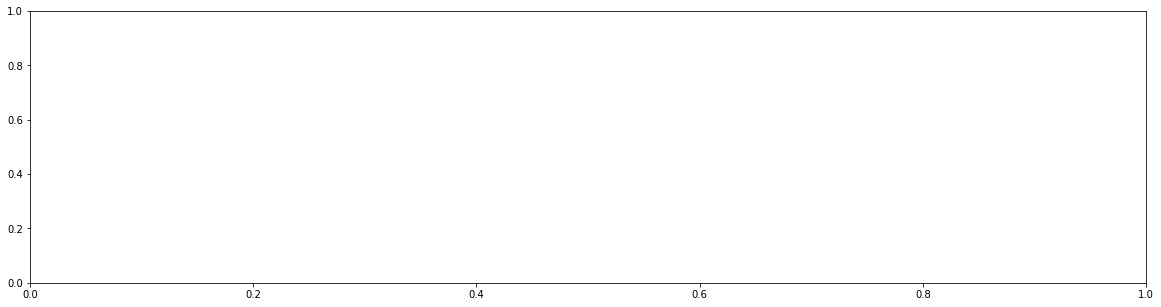

In [20]:
x = np.arange(len(setores))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize= (20,5))
rects1 = ax.bar(x - width/2, exportacoes, width)
#rects2 = ax.bar(x + width/2, importacoes, width)

ax.set_ylabel('Scores')
ax.set_title('Importações x Exportações Brasileiras')
ax.set_xticks(x, setores)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


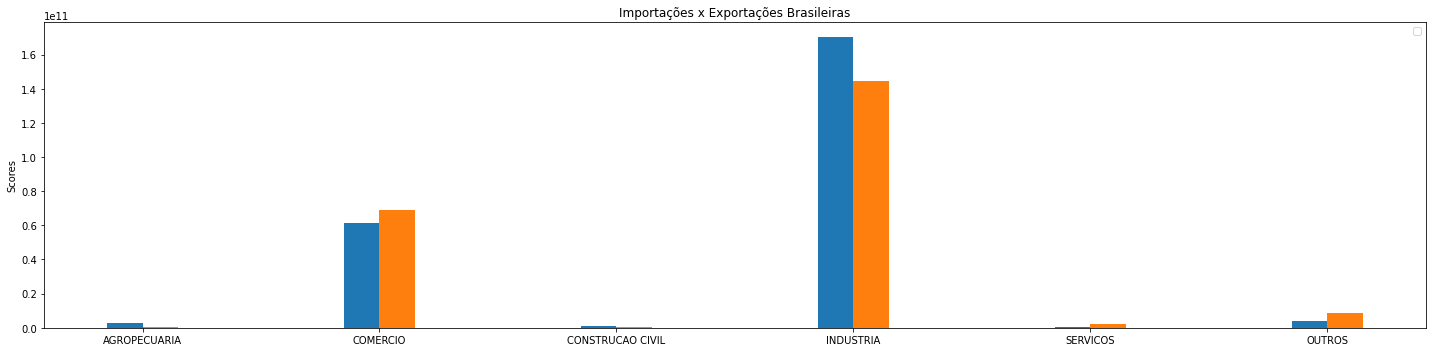

In [19]:
#plot 2012
df_exportacoes = df[(df['CO_ANO'] == 2012) & (df['FLUXO'] == 'EXP')]
df_importacoes = df[(df['CO_ANO'] == 2012) & (df['FLUXO'] == 'IMP')]
'''df_exportacoes_2013 = df[(df['CO_ANO'] == 2013) & (df['FLUXO'] == 'EXP')]
df_importacoes_2013 = df[(df['CO_ANO'] == 2013) & (df['FLUXO'] == 'IMP')]
df_exportacoes_2014 = df[(df['CO_ANO'] == 2014) & (df['FLUXO'] == 'EXP')]
df_importacoes_2014 = df[(df['CO_ANO'] == 2014) & (df['FLUXO'] == 'IMP')]
df_exportacoes_2015 = df[(df['CO_ANO'] == 2015) & (df['FLUXO'] == 'EXP')]
df_importacoes_2015 = df[(df['CO_ANO'] == 2015) & (df['FLUXO'] == 'IMP')]'''

a = df_exportacoes.groupby(['SETOR','FLUXO']).sum()
b = df_importacoes.groupby(['SETOR','FLUXO']).sum()
'''c = df_exportacoes_2013.groupby(['SETOR','FLUXO']).sum()
d = df_importacoes_2013.groupby(['SETOR','FLUXO']).sum()
e = df_exportacoes_2014.groupby(['SETOR','FLUXO']).sum()
f = df_importacoes_2014.groupby(['SETOR','FLUXO']).sum()
g = df_exportacoes_2015.groupby(['SETOR','FLUXO']).sum()
h = df_importacoes_2015.groupby(['SETOR','FLUXO']).sum()
'''
#setores = list(df['SETOR'].unique()) #['AGROPECUARIA', 'COMERCIO', 'CONSTRUCAO CIVIL', 'INDUSTRIA', 'SERVICOS', 'OUTROS']
#exportacoes_2012 = a['VL_FOB'].values
#importacoes_2012 = b['VL_FOB'].values
'''exportacoes_2013 = c['VL_FOB'].values
importacoes_2013 = d['VL_FOB'].values
exportacoes_2014 = e['VL_FOB'].values
importacoes_2014 = f['VL_FOB'].values
exportacoes_2015 = g['VL_FOB'].values
importacoes_2015 = h['VL_FOB'].values'''


x = np.arange(len(setores))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize= (20,5))
rects1 = ax.bar(x - width/2, exportacoes_2012, width)
rects2 = ax.bar(x + width/2, importacoes_2012, width)
'''rects3 = ax.bar(x + width*2, exportacoes_2013, width, label='exportacoes_2013')
rects4 = ax.bar(x + width*3, importacoes_2013, width, label='importacoes_2013')

rects5 = ax.bar(x - width*4, exportacoes_2014, width, label='exportacoes2014')
rects6 = ax.bar(x + width*5, importacoes_2014, width, label='importacoes2014')
rects7 = ax.bar(x + width*6, exportacoes_2015, width, label='exportacoes_2015')
rects8 = ax.bar(x + width*7, importacoes_2015, width, label='importacoes_2015')'''




# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Importações x Exportações Brasileiras')
ax.set_xticks(x, setores)
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


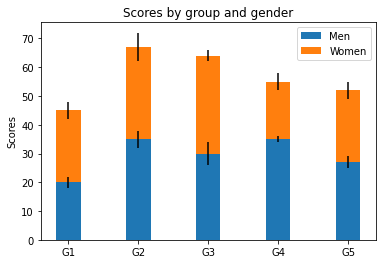

In [65]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()


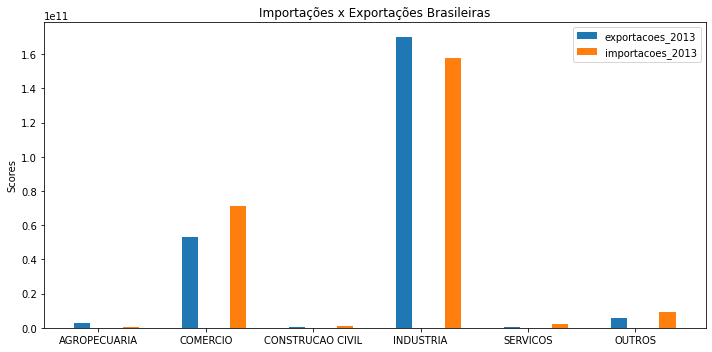

In [58]:
df_exportacoes_2013 = df[(df['CO_ANO'] == 2013) & (df['FLUXO'] == 'EXP')]
df_importacoes_2013 = df[(df['CO_ANO'] == 2013) & (df['FLUXO'] == 'IMP')]
a = df_exportacoes_2013.groupby(['SETOR','FLUXO']).sum()
b = df_importacoes_2013.groupby(['SETOR','FLUXO']).sum()

setores = list(df['SETOR'].unique()) #['AGROPECUARIA', 'COMERCIO', 'CONSTRUCAO CIVIL', 'INDUSTRIA', 'SERVICOS', 'OUTROS']
exportacoes_2013 = a['VL_FOB'].values
importacoes_2013 = b['VL_FOB'].values

x = np.arange(len(setores))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize= (10,5))
rects1 = ax.bar(x - width, exportacoes_2013, width, label='exportacoes_2013')
rects2 = ax.bar(x + width , importacoes_2013, width, label='importacoes_2013')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Importações x Exportações Brasileiras')
ax.set_xticks(x, setores)
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()







In [11]:
barWitdth = 0.25

r1 = np.arange(len(exportacoes_2012))
r2 = [x + barWitdth for x in r1]

<BarContainer object of 6 artists>

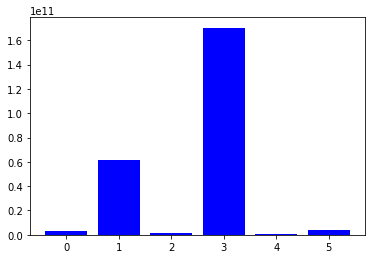

In [12]:
plt.bar(r1, exportacoes_2012,color= 'blue', label= setores)

In [8]:
df.groupby('FAIXA_EMPREGADOS').count()

,CO_ANO,SETOR,VL_FOB,QTD_OPER,FLUXO
FAIXA_EMPREGADOS,,,,,
De 0 - 9 Empregados,80,80,80,80,80
De 10 - 19 Empregados,80,80,80,80,80
De 100 - 249 Empregados,80,80,80,80,80
De 20 - 49 Empregados,80,80,80,80,80
De 250 - 499 Empregados,80,80,80,80,80
De 50 - 99 Empregados,80,80,80,80,80
Igual ou acima de 500 Empregados,80,80,80,80,80
NAO DEFINIDO,91,91,91,91,91
PESSOA FISICA,16,16,16,16,16
